In [60]:
%pylab inline
import pynbody
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


Tengo un delta de corte de Kitayama 1996 segun esta relacion 

In [61]:
def delta(z,om,ol):
    f=(om*(1+z)**3)/((om*(1+z)**3)+ol)
    d=6*(np.pi**2) * (1.+0.4093*(((1./f) - 1.)**(0.9052)))-1
    
    d2=((3*(12*np.pi)**(2./3.))/20.)*(1.+0.123*np.log10(f))
    
    return d

In [75]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0_s=pynbody.load(path+'snapshot_050')

In [76]:
gas0_s=s0_s.gas
pos0_s=gas0_s['pos']
ne0_s=gas0_s['ne']
u0_s=gas0_s['u']
rho0_s=gas0_s['rho']

In [77]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

r0_s=np.sqrt((pos0_s[:,0]-xc)**2+(pos0_s[:,1]-yc)**2+(pos0_s[:,2]-zc)**2)

rv_s=8
cutv0_s, = np.where(r0_s<rv_s)

In [78]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0_s=(1.0-yHe)/(1+yHe+ne0_s)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0_s=(5./3.-1.)*u0_s*vv*mu0_s*mp/kcgs
dgsv_s=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)*.4  #el 0.4 es porque tengo un 40% de la densidad del universo en esa region (la densidad integrada es 0.6) 
                                                      # cuando se lo mostre a dante lo habia hecho con 0.1
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)

Text(0.5, 1.0, 'Into The Void')

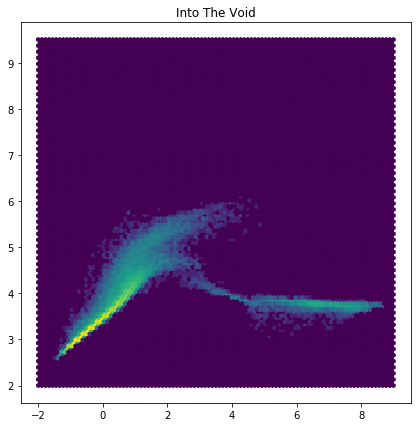

In [79]:
plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0_s[cutv0_s]/dgs),np.log10(te0_s[cutv0_s]),bins='log',extent=(-2,9,2,9.5))
plt.title('Into The Void')

Aca voy a obtener los porcentajes en el void

In [80]:
difu_vs, = np.where((te0_s[cutv0_s] < 10**5)  & (rho0_s[cutv0_s] < delta(redshift,0.276,0.724)))
whim_vs, = np.where((te0_s[cutv0_s] >= 10**5) & (rho0_s[cutv0_s] < delta(redshift,0.276,0.724)))
hot_vs,  = np.where((te0_s[cutv0_s] >= 10**5) & (rho0_s[cutv0_s] >= delta(redshift,0.276,0.724)))
cond_vs, = np.where((te0_s[cutv0_s] < 10**5)  & (rho0_s[cutv0_s] >= delta(redshift,0.276,0.724)))
tot_vs=len(difu_vs) + len(whim_vs) + len(hot_vs) + len(cond_vs)
dp_vs=len(difu_vs)/tot_vs
wp_vs=len(whim_vs)/tot_vs
hp_vs=len(hot_vs)/tot_vs
cp_vs=len(cond_vs)/tot_vs
print('difusa',dp_vs)
print('whim',wp_vs)
print('hot',hp_vs)
print('condensada',cp_vs)

difusa 0.8620869666093076
whim 0.016086309236093655
hot 0.023704104715686083
condensada 0.09812261943891262


Aca voy a hacer lo mismo con el void R, OJO QUE REESCRIBO TODAS LAS VARIABLES !!! )  (

puede no correrse y anda todo)

difusa 0.8167790473022251
whim 0.05384034699387131
hot 0.03335593740803767
condensada 0.09602466829586602


Text(0.5, 1.0, 'Into The Void')

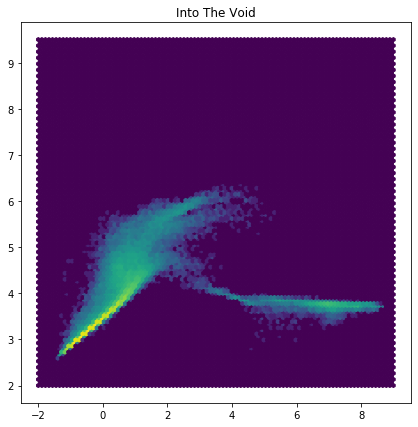

In [49]:
path='/mnt/is2/dpaz/ITV/R1198/out/'
s0_r=pynbody.load(path+'snapshot_050')
gas0_r=s0_r.gas
pos0_r=gas0_r['pos']
ne0_r=gas0_r['ne']
u0_r=gas0_r['u']
rho0_r=gas0_r['rho']
xbox=411.2170 
ybox=162.1655
zbox=453.0553
xc=413.621475 -xbox+250
yc= 162.604601   -ybox+250
zc=448.953638-zbox+250
r0_r=np.sqrt((pos0_r[:,0]-xc)**2+(pos0_r[:,1]-yc)**2+(pos0_r[:,2]-zc)**2)

rv_r=8.8
cutv0_r, = np.where(r0<rv_r)
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0_r=(1.0-yHe)/(1+yHe+ne0_r)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0_r=(5./3.-1.)*u0_r*vv*mu0_r*mp/kcgs
dgsv_r=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)*.4  #el 0.4 es porque tengo un 40% de la densidad del universo en esa region (la densidad integrada es 0.6) 
                                                      # cuando se lo mostre a dante lo habia hecho con 0.1
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)
difu_vr, = np.where((te0_r[cutv0_r] < 10**5)  & (rho0_r[cutv0] < delta(redshift,0.276,0.724)))
whim_vr, = np.where((te0_r[cutv0_r] >= 10**5) & (rho0_r[cutv0] < delta(redshift,0.276,0.724)))
hot_vr,  = np.where((te0_r[cutv0_r] >= 10**5) & (rho0_R[cutv0] >= delta(redshift,0.276,0.724)))
cond_vr, = np.where((te0_r[cutv0_r] < 10**5)  & (rho0[cutv0] >= delta(redshift,0.276,0.724)))

tot_vr=len(difu_v) + len(whim_v) + len(hot_v) + len(cond_v)
dp_vr=len(difu_v)/tot_vr
wp_vr=len(whim_v)/tot_vr
hp_vr=len(hot_v)/tot_vr
cp_vr=len(cond_v)/tot_vr
print('difusa',dp_vr)
print('whim',wp_vr)
print('hot',hp_vr)
print('condensada',cp_vr)

plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),bins='log',extent=(-2,9,2,9.5))
plt.title('Into The Void')

In [9]:
len(s0.star)

19995748

In [24]:
error=[]; z=[]; difu=[]; cond=[]; hot=[]; whim=[]; star=[]
for i in range(20,51):
    x=str(i)
    print(i)
    path='/mnt/is0/fstasys/512_b/out/'
    s=pynbody.load(path+'snapdir_0'+x+'/'+'snapshot_0'+x+'.0')
    a=s.properties['a']
    om=s.properties['omegaM0']
    ol=s.properties['omegaL0']

    redshift=1./a -1
       
    gas=s.gas
    pos=gas['pos']
    u=gas['u']
    ne=gas['ne']
    rho=gas['rho']
       
    mu=(1.0-yHe)/(1+yHe+ne)
    te=(5./3.-1.)*u*vv*mu*(mp/kcgs)#*(a**2)
   
    difu_, = np.where((te < 10**5)  & (rho < delta(redshift,om,ol)))
    whim_, = np.where((te >= 10**5) & (rho < delta(redshift,om,ol)))
    hot_,  = np.where((te >= 10**5) & (rho >= delta(redshift,om,ol)))
    cond_, = np.where((te < 10**5)  & (rho >= delta(redshift,om,ol)))

    difu.append(len(difu_))
    whim.append(len(whim_))
    hot.append(len(hot_))
    cond.append(len(cond_))
    z.append(redshift)
    star.append(len(s.star))

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


Entonces ahora tengo en las listas difu,whim hot, cond la cantidad de particulas que pertenecen a cada fase. Ahora quiero contruir los porcentajes que representan del total. 

In [39]:
error_s=[]
error_r=[]
for i in range(len(difu)):
    d=difu[i]
    h=hot[i]
    w=whim[i]
    c=cond[i]
    tot=d+h+w+c
    dp=d/tot
    hp=h/tot
    wp=w/tot
    cp=c/tot
    es = (dp - dp_vs )**2 + (hp-hp_vs)**2 + (wp-wp_vs)**2 + (cp-cp_vs)**2
    error_s.append(es)
    er = (dp - dp_vr )**2 + (hp-hp_vr)**2 + (wp-wp_vr)**2 + (cp-cp_vr)**2
    error_r.append(er)

[]

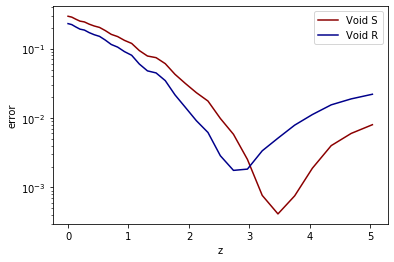

In [42]:
plt.plot(z,error_s,color='darkred',label='Void S')
plt.plot(z,error_r,color='darkblue',label='Void R')
plt.legend()
plt.ylabel('error')
plt.xlabel('z')
plt.semilogy()

In [51]:
path='/mnt/is0/fstasys/512_b/out/snapdir_026/'
s1=pynbody.load(path+'snapshot_026')
a=s1.properties['a']
redshift=1./a -1
   
gas1=s1.gas
pos1=gas1['pos']
u1=gas1['u']
ne1=gas1['ne']
rho1=gas1['rho']

In [12]:
dm=s1.dm
mass=dm['mass']

In [13]:
np.min(mass)

SimArray(0.09328805, dtype=float32, '1.00e+10 Msol h**-1')

In [52]:
redshift

3.212058526303448

In [53]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu1=(1.0-yHe)/(1+yHe+ne1)
te1=(5./3.-1.)*u1*vv*mu1*mp/kcgs

In [56]:
cut=np.arange(0,len(u1),1000)

Text(0.5, 1.0, 'universo')

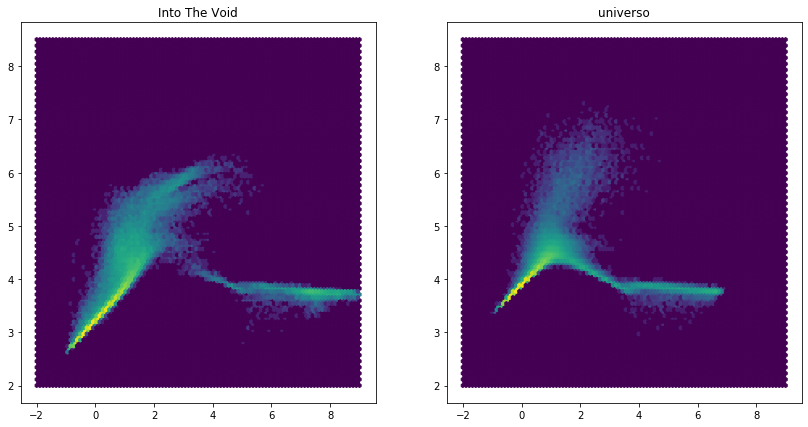

In [57]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.hexbin(np.log10(rho0[cutv0]/dgsv),np.log10(te0[cutv0]),bins='log',extent=(-2,9,2,8.5))
plt.title('ITV R')

plt.subplot(122)
plt.hexbin(np.log10(rho1[cut]/dgs),np.log10(te1[cut]),bins='log',extent=(-2,9,2,8.5))
plt.title('universo')

In [ ]:
masa=

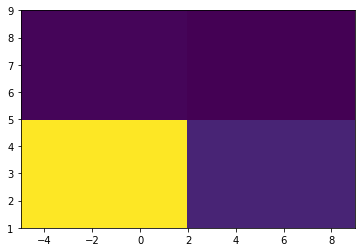

In [10]:
h1=plt.hist2d(np.log10(rho1/dgs),np.log10(te1),bins=2,range=([-5,9],[1,9]),density='true')
h0=plt.hist2d(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),bins=2,range=([-5,9],[1,9]),density='true')

In [11]:
print('Universo',h1[0])

print('ITV',h0[0])

Universo [[0.02945807 0.00214132]
 [0.00357771 0.00053719]]
ITV [[0.0294967  0.00136622]
 [0.00382994 0.00102143]]


In [36]:
np.sum(h0[0])

0.03571428571428571